In [1]:
import numpy as np
import pandas as pd
import pymc3 as pm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons
from scipy import stats
import patsy

%matplotlib inline

sns.set_style("whitegrid")

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
pm.__version__

'3.5'

In [3]:
df = pd.read_csv("mtcars.csv")

In [4]:
df.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [16]:
m = pm.Model()

with m:
    a = pm.Normal("a", 20, 10)
    b = pm.Normal("b", 0, 3)
    e = pm.Normal("e", 0, 5)
    sd = pm.HalfNormal("sd", 1)
    
    
    u = a + b * df.wt + e
    ylike = pm.Normal("ylike", u, sd, observed=df.mpg)
    
    trace = pm.sample(5000, njobs=2, progressbar=False)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sd, e, b, a]


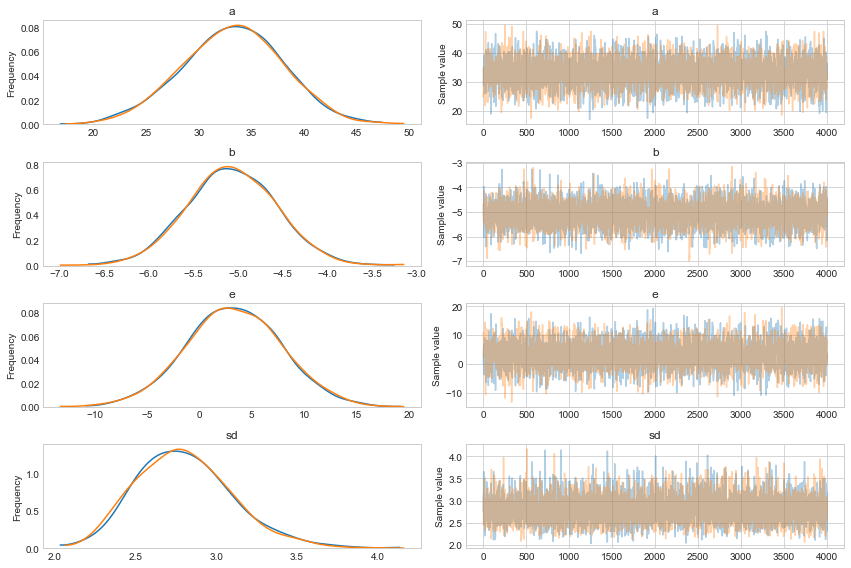

In [17]:
pm.traceplot(trace[1000:]);

''

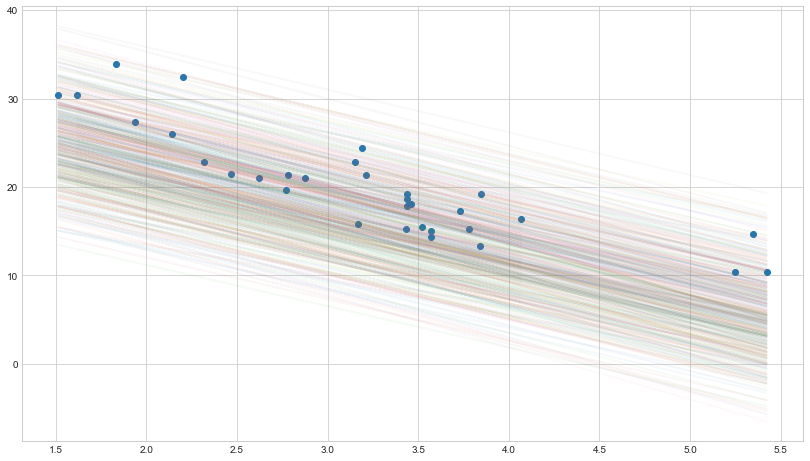

In [20]:
trace_z = list(np.random.choice(np.arange(2000, 4990), size=500))

plt.figure(figsize=(14, 8));

plt.scatter(df.wt, df.mpg)

for i in trace_z:
    plt.plot(df.wt, trace["a"][i] + trace["b"][i] * df.wt, alpha=.04)
    
;